C:\Users\86182\AppData\Local\Temp\ipykernel_20992\4020086170.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)                     # forward fill
C:\Users\86182\AppData\Local\Temp\ipykernel_20992\4020086170.py:48: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)                     # backward fill


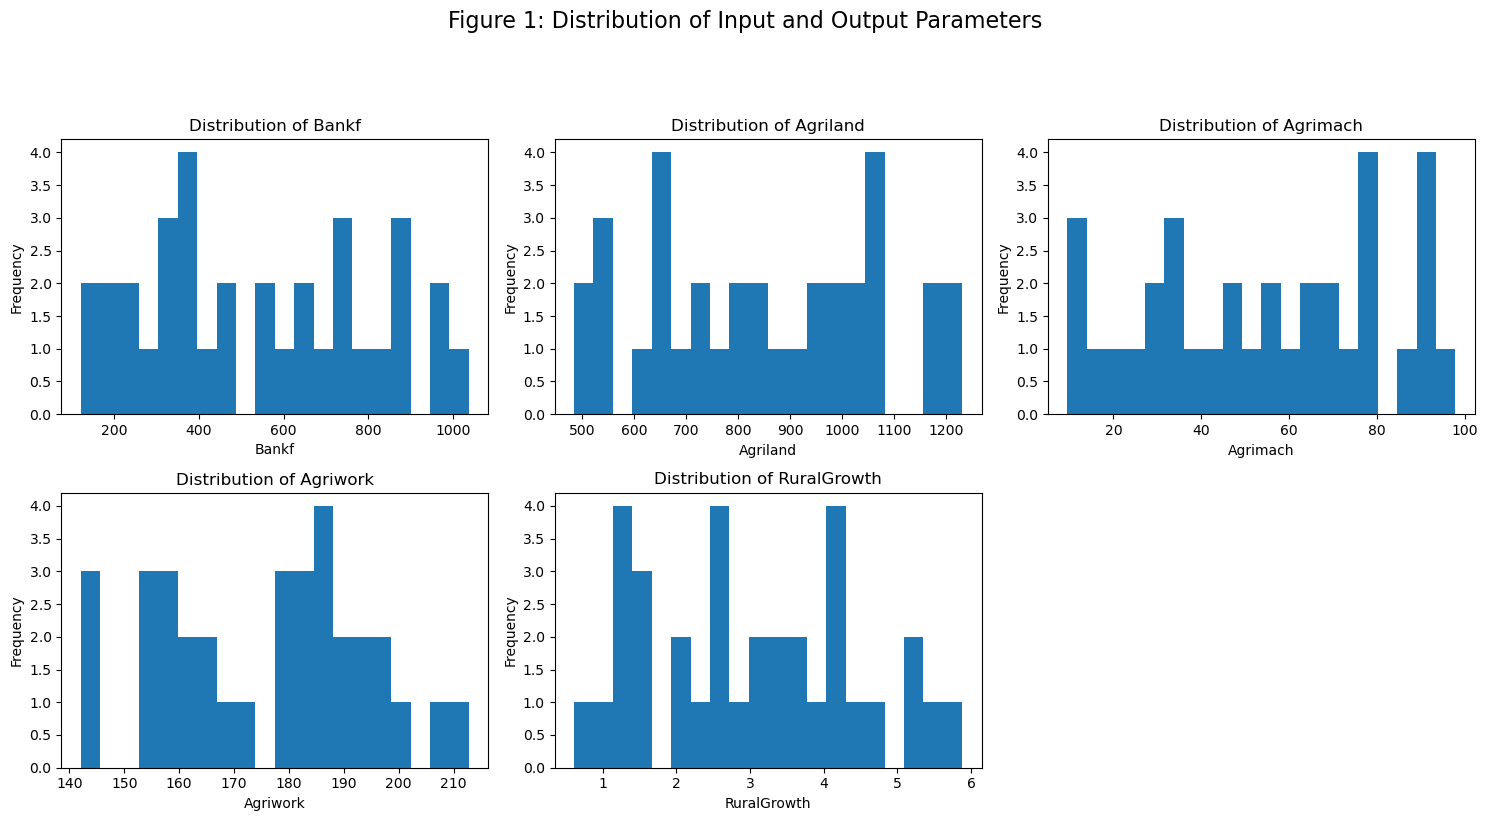

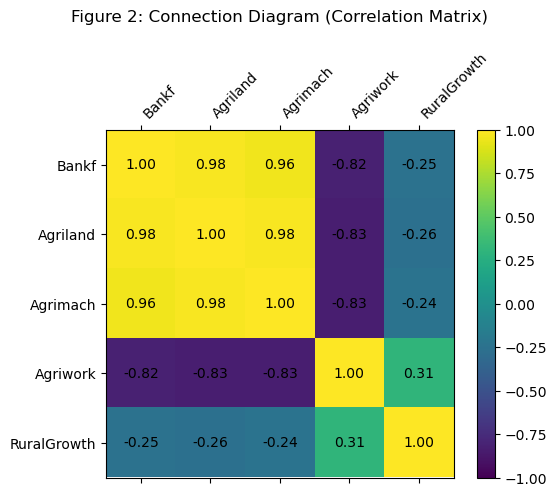

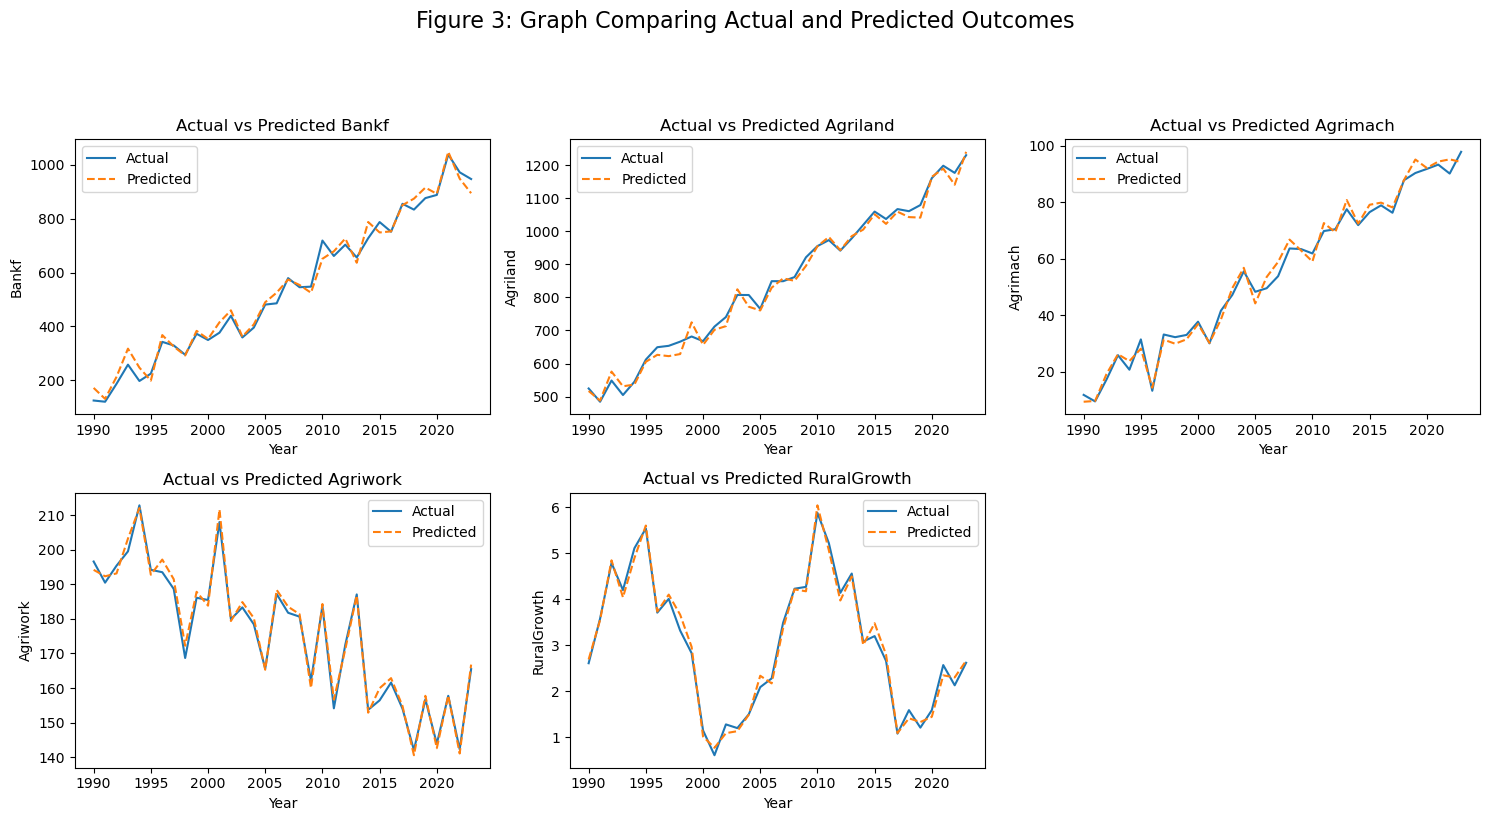

In [4]:
"""
Environment and Dependencies:
- Python: >=3.8
- Libraries:
    pandas >=1.3
    numpy >=1.21
    matplotlib >=3.4
    scipy >=1.7
- Install via:
    pip install pandas numpy matplotlib scipy

Data Acquisition:
- Bankf: Annual agricultural credit and financing data from the Algerian Ministry of Finance statistical bulletins.
- Agriland: Cultivated land area statistics from the Algerian Ministry of Agriculture yearbooks.
- Agrimach: Number of agricultural machinery units per 100 km², reported in the Ministry of Agriculture equipment surveys.
- Agriwork: Rural agricultural workforce (in ten-thousands) from national labor force surveys published by the Ministry of Agriculture.
- RuralGrowth: Annual percent growth of agricultural output calculated from gross agricultural product series in World Bank’s World Development Indicators (WDI).

Raw data were extracted from:
  1. Algerian Statistical Yearbook Excel files.
  2. World Bank WDI time series CSV.

Missing Value Handling:
- Numeric fields: linear interpolation for gaps ≤2 years, then forward/backward fill for any remaining.
- Verify no missing values after processing.
These were merged on Year to produce R3_cleaned_data.csv.

Indicator Definitions:
- Bankf: total agricultural financing (local currency units)
- Agriland: cultivated land area (hectares)
- Agrimach: agricultural machinery count (units per 100 km²)
- Agriwork: agricultural workforce (ten-thousands of persons)
- RuralGrowth: year‑on‑year percentage change in agricultural output

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Load cleaned and merged data
df = pd.read_csv('R3_cleaned_data.csv')

# Handle missing values
df.interpolate(method='linear', limit=2, inplace=True)      # small gaps
df.fillna(method='ffill', inplace=True)                     # forward fill
df.fillna(method='bfill', inplace=True)                     # backward fill

# Confirm no missing values
assert df.isnull().sum().sum() == 0, "Missing values remain!"

# Generate placeholder predictions (replace with model outputs)
np.random.seed(0)
predictions = {
    col: df[col] + np.random.normal(0, df[col].std() * 0.1, len(df))
    for col in df.columns if col != 'Year'
}

# Figure 1: Distribution of each parameter
fig1, axes1 = plt.subplots(2, 3, figsize=(15, 8))
axes1 = axes1.flatten()
for i, col in enumerate(df.columns[1:]):
    axes1[i].hist(df[col], bins=20)
    axes1[i].set_title(f'Distribution of {col}')
    axes1[i].set_xlabel(col)
    axes1[i].set_ylabel('Frequency')
axes1[-1].axis('off')
fig1.suptitle('Figure 1: Distribution of Input and Output Parameters', fontsize=16, y=1.02)
fig1.tight_layout(rect=[0, 0, 1, 0.95])

# Figure 2: Correlation matrix with values
corr = df.drop(columns='Year').corr().round(2)
fig2, ax2 = plt.subplots(figsize=(6, 5))
cax = ax2.matshow(corr, vmin=-1, vmax=1)
fig2.colorbar(cax)
labels = corr.columns.tolist()
ax2.set_xticks(np.arange(len(labels)))
ax2.set_yticks(np.arange(len(labels)))
ax2.set_xticklabels(labels, rotation=45, ha='left')
ax2.set_yticklabels(labels)
for (i, j), val in np.ndenumerate(corr.values):
    ax2.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')
ax2.set_title('Figure 2: Connection Diagram (Correlation Matrix)', pad=20)
fig2.tight_layout()

# Figure 3: Actual vs Predicted for each variable
fig3, axes3 = plt.subplots(2, 3, figsize=(15, 8))
axes3 = axes3.flatten()
for i, col in enumerate(df.columns[1:]):
    axes3[i].plot(df['Year'], df[col], label='Actual')
    axes3[i].plot(df['Year'], predictions[col], linestyle='--', label='Predicted')
    axes3[i].set_title(f'Actual vs Predicted {col}')
    axes3[i].set_xlabel('Year')
    axes3[i].set_ylabel(col)
    axes3[i].legend()
axes3[-1].axis('off')
fig3.suptitle('Figure 3: Graph Comparing Actual and Predicted Outcomes', fontsize=16, y=1.02)
fig3.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
